<a href="https://colab.research.google.com/github/enessehirli1/YOLOV5_MVTec/blob/main/yolov5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Installing Pre-Requesties

In [1]:
!git clone https://github.com/ultralytics/yolov5  # clone repo
!pip install -U -r yolov5/requirements.txt  # install dependencies

%cd /content/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.
  Using cached numpy-2.0.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (19.3 MB)
/content/yolov5


In [2]:
!pip install gdrivedownload

In [3]:
import torch
from IPython.display import Image  # for displaying images

print('torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))


torch 2.3.1+cu121 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15102MB, multi_processor_count=40)


## Bounding Box Dataset


In [4]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="********************")
project = rf.workspace("projectsenes").project("fabric-defect-kx5ua")
version = project.version(2)
dataset = version.download("yolov5")


loading Roboflow workspace...
loading Roboflow project...


In [7]:
%cd /content


/content


In [9]:
%cat yolov5/Fabric-Defect-2/data.yaml

names:
- color
- cut
- hole
- metal_contamination
- thread
nc: 5
roboflow:
  license: CC BY 4.0
  project: fabric-defect-kx5ua
  url: https://universe.roboflow.com/projectsenes/fabric-defect-kx5ua/dataset/2
  version: 2
  workspace: projectsenes
test: ../test/images
train: Fabric-Defect-2/train/images
val: Fabric-Defect-2/valid/images


In [10]:
import yaml
with open('yolov5/Fabric-Defect-2/data.yaml', 'r') as stream:
    num_classes = str(yaml.safe_load(stream)['nc'])

num_classes

'5'

In [20]:
%%time
%cd /content/yolov5
!python train.py --img 640 --batch 16 --epochs 200 --data Fabric-Defect-2/data.yaml --weights yolov5s.pt --cache --cfg models/yolov5s.yaml --patience 50

/content/yolov5
2024-06-26 13:17:15.810500: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-26 13:17:15.810554: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-26 13:17:15.812080: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=models/yolov5s.yaml, data=Fabric-Defect-2/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=200, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=ram, image_weights=False, 

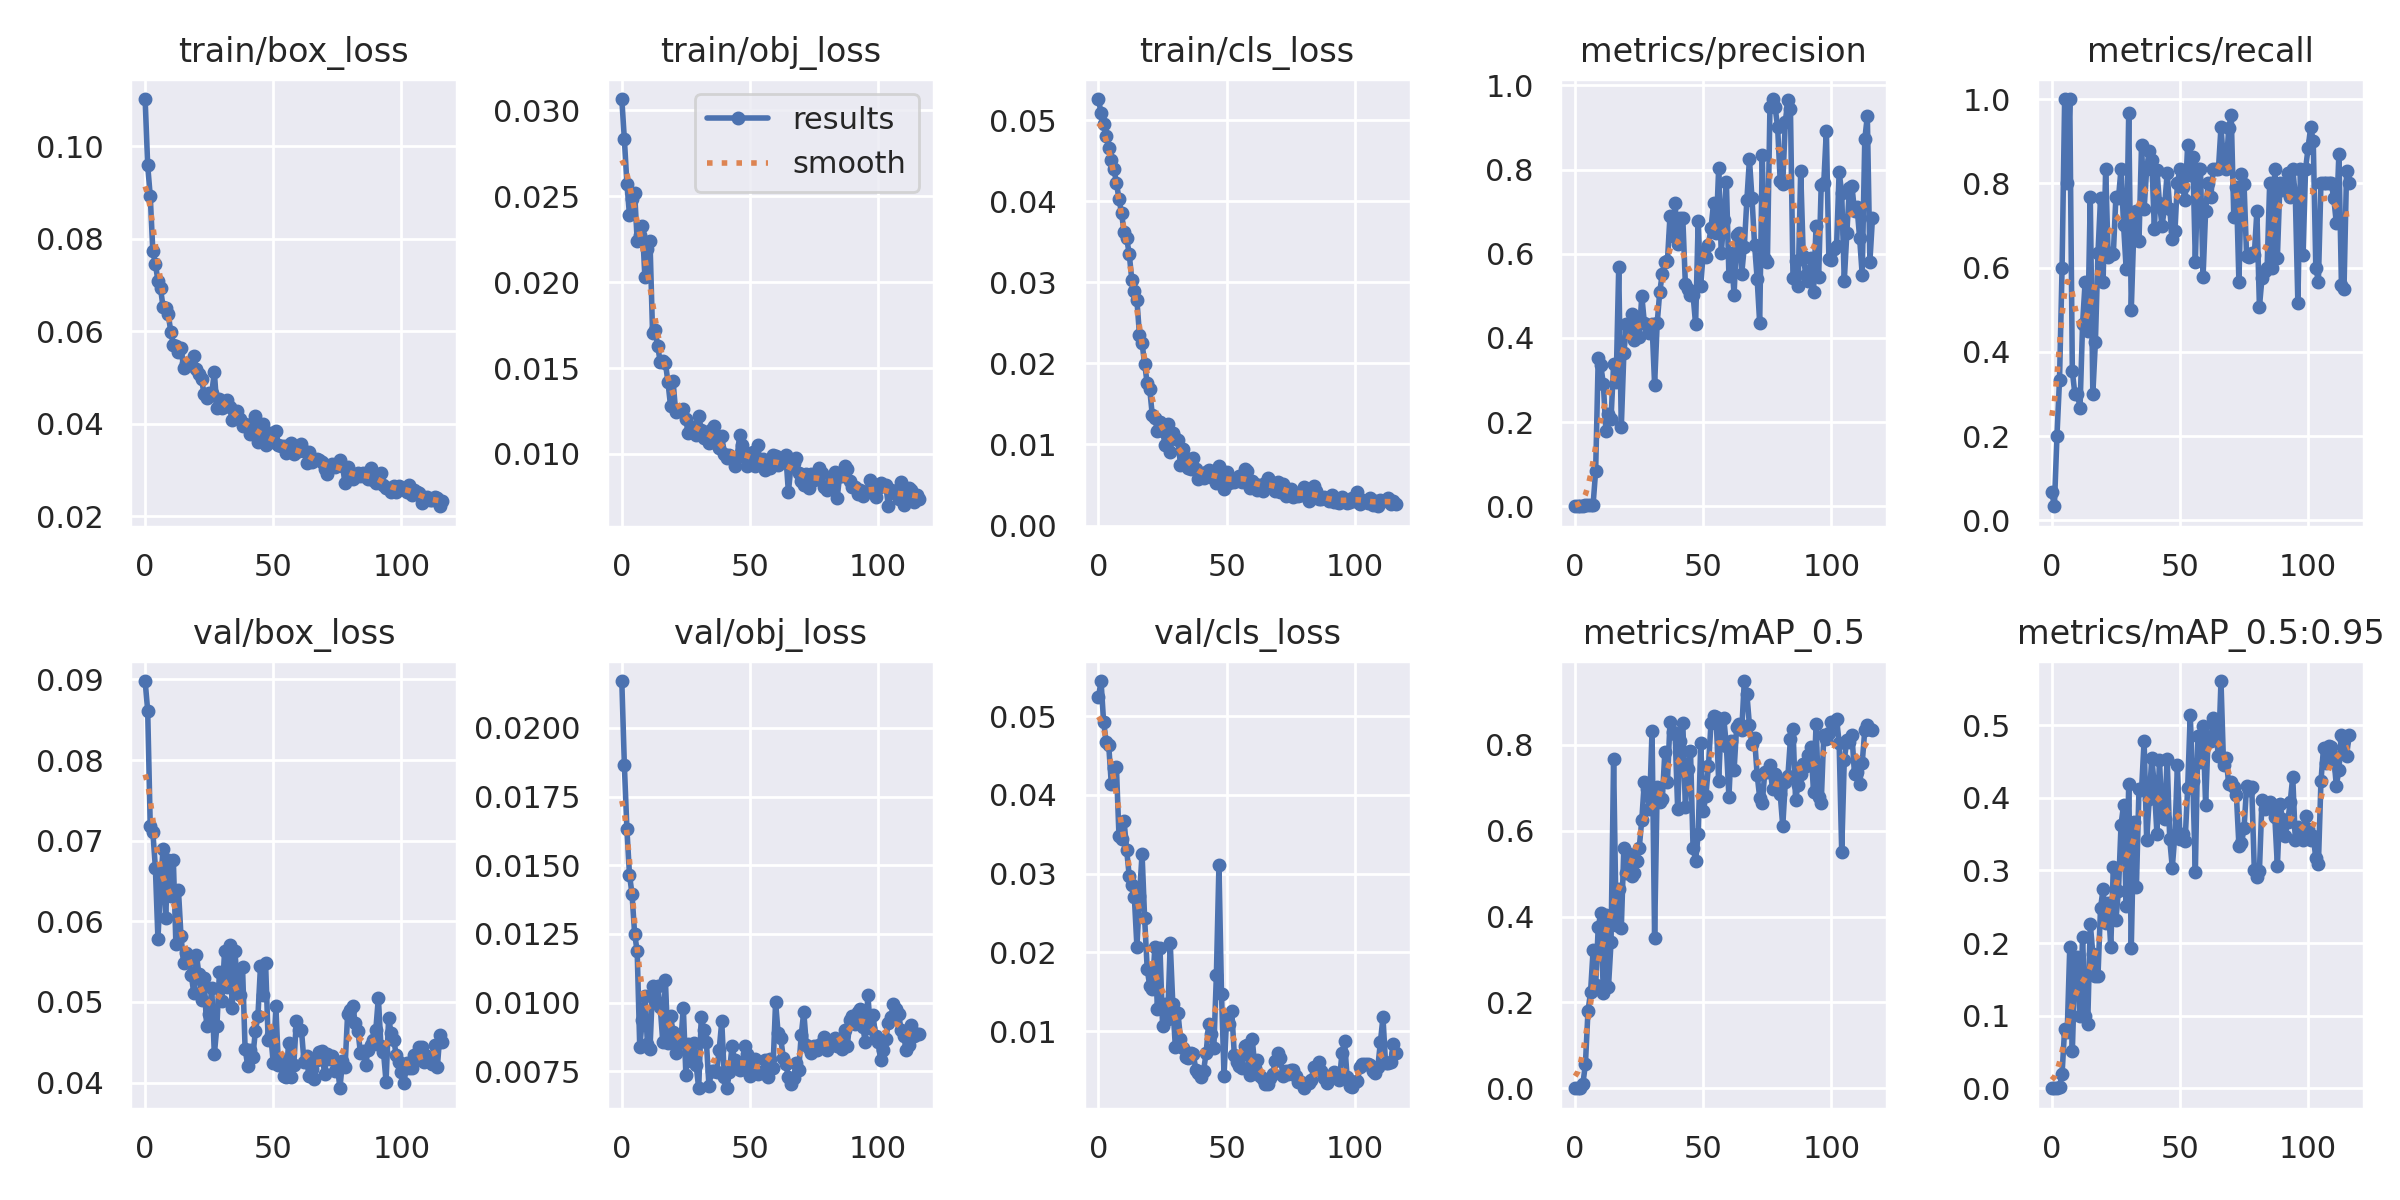

In [21]:
from utils.plots import plot_results  # plot results.txt as results.png
Image(filename='/content/yolov5/runs/train/exp2/results.png', width=1000)  # view results.png

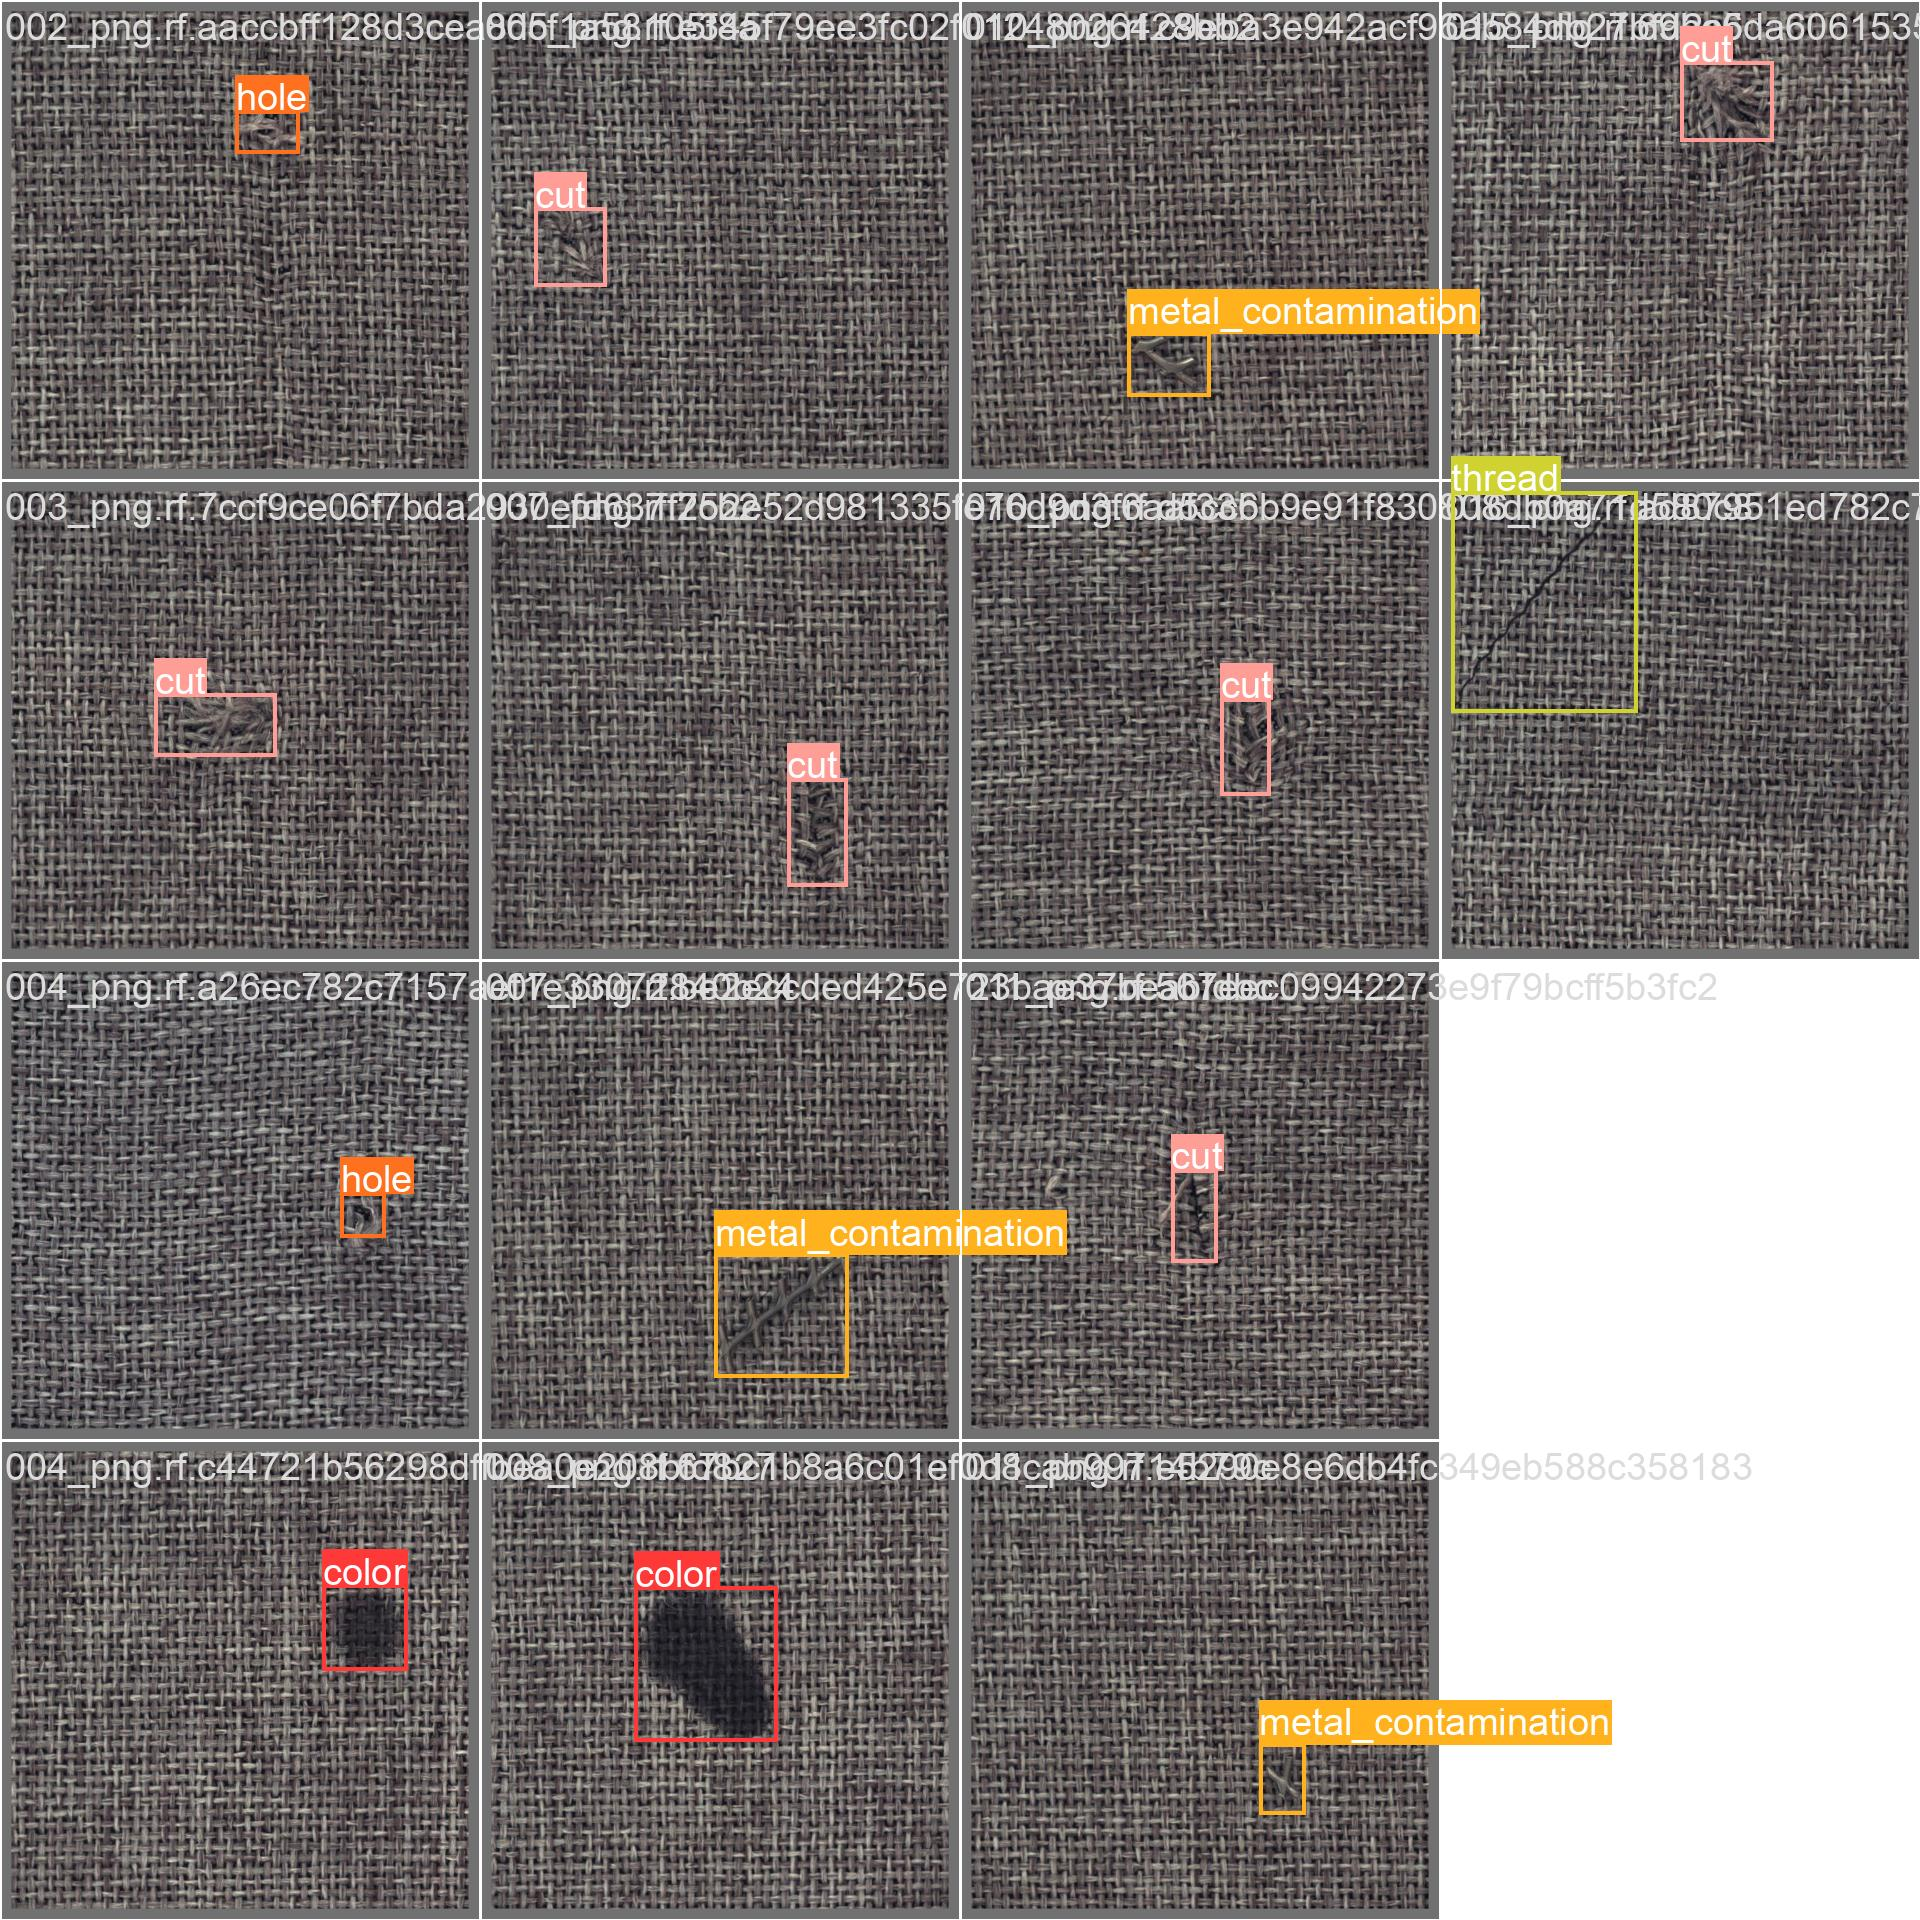

In [22]:
Image(filename="/content/yolov5/runs/train/exp2/val_batch0_labels.jpg", width=900)

In [16]:
%ls runs/train/exp/weights

best.pt  last.pt


In [26]:
%cd /content/yolov5/
!python detect.py --weights runs/train/exp/weights/best.pt --img 640 --conf 0.4 --source Fabric-Defect-2/test/images/


/content/yolov5
detect: weights=['runs/train/exp/weights/best.pt'], source=Fabric-Defect-2/test/images/, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-331-gab364c98 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7023610 parameters, 0 gradients, 15.8 GFLOPs
image 1/13 /content/yolov5/Fabric-Defect-2/test/images/000_png.rf.3e2025726d9c04dc667a060038643372.jpg: 640x640 1 metal_contamination, 11.5ms
image 2/13 /content/yolov5/Fabric-Defect-2/test/images/001_png.rf.3542aee1c51ca7d84e8bf98bd5a0a9b1.jpg: 640x640 1 hole, 11.6ms
image 3/13 /content/yolov5/Fabric-

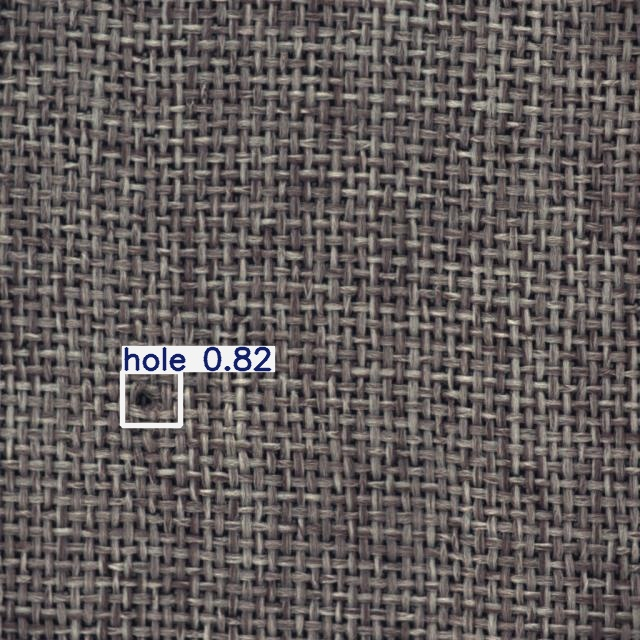

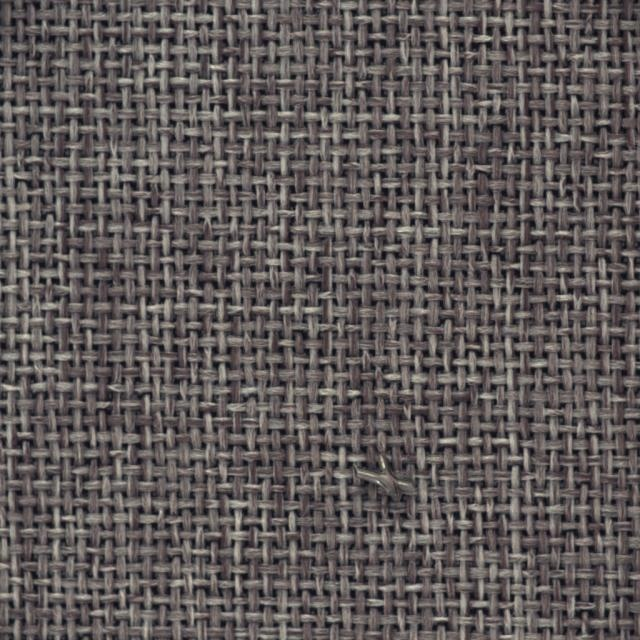

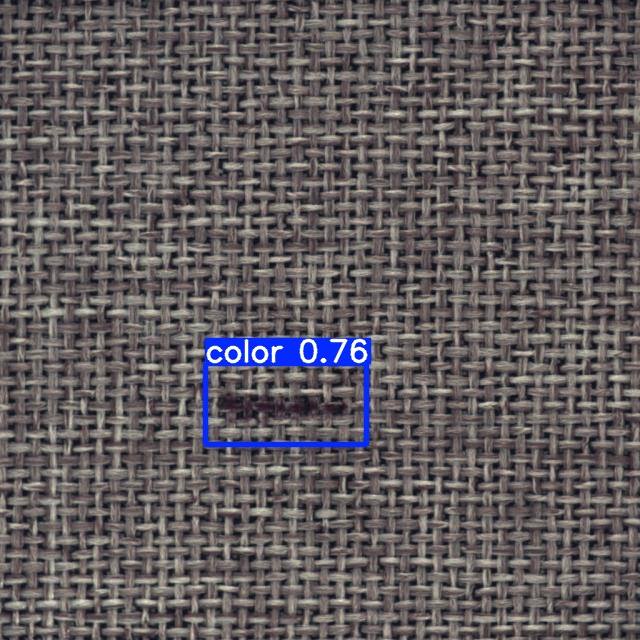

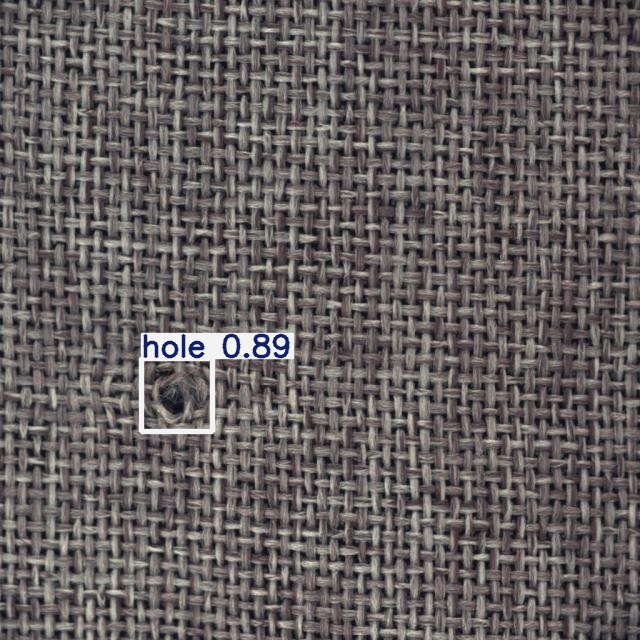

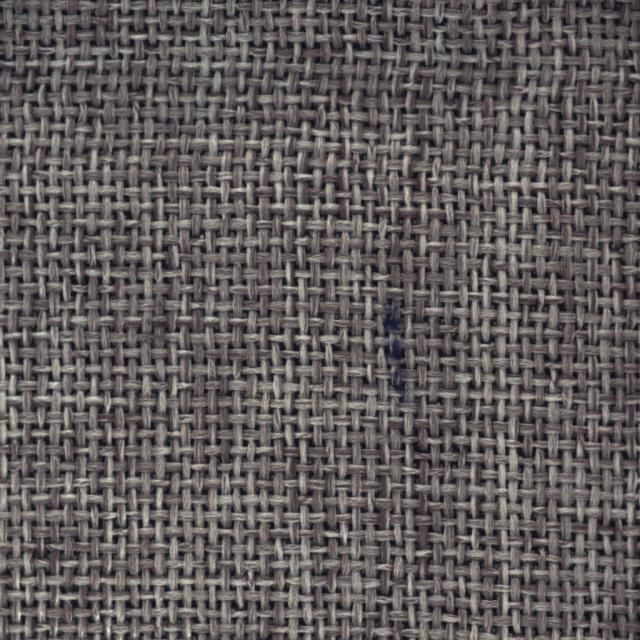

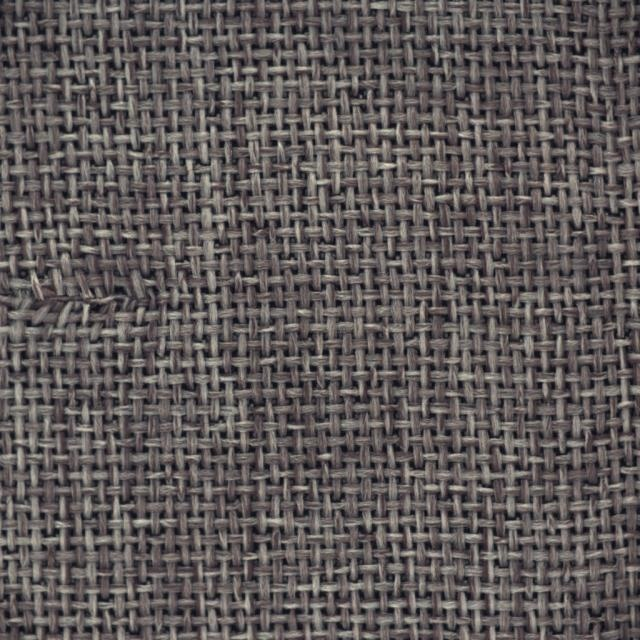

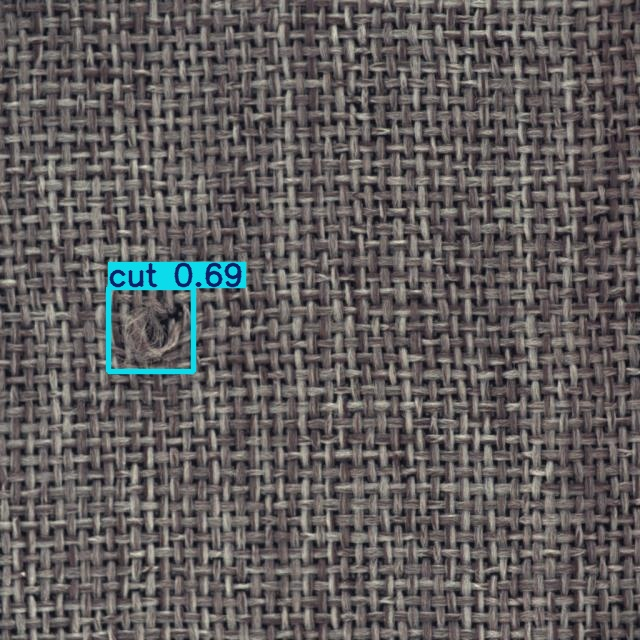

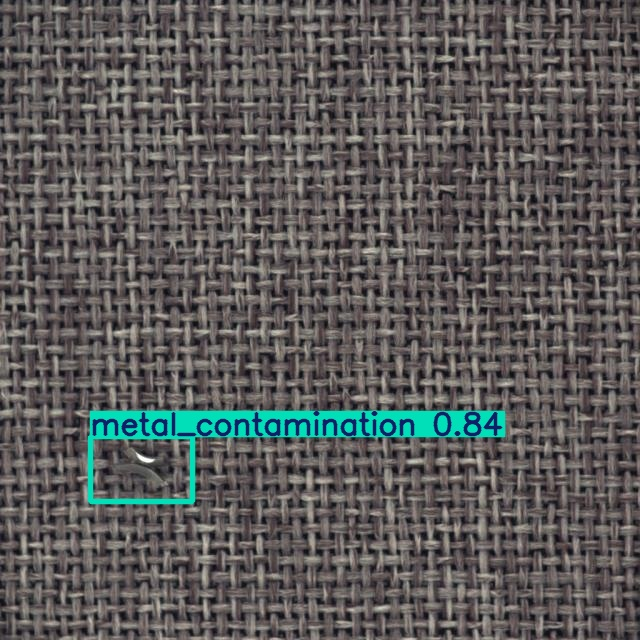

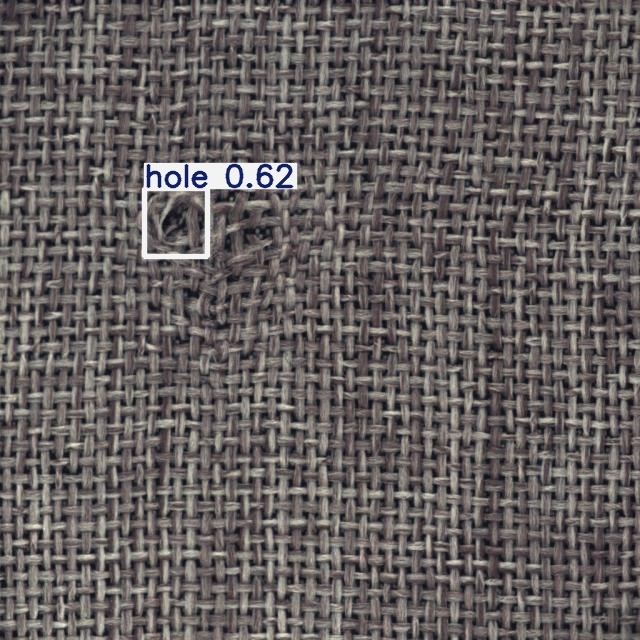

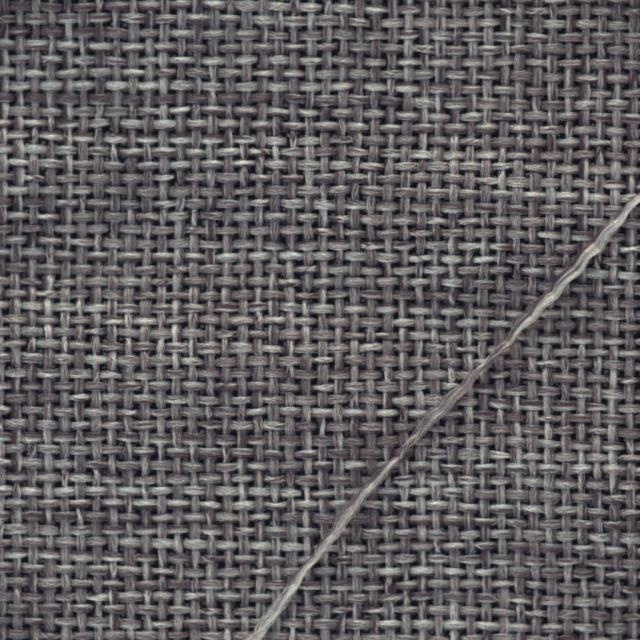

In [19]:
import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/yolov5/runs/detect/exp2/*.jpg')[:10]: #assuming JPG
    display(Image(filename=imageName))

In [27]:
rf = Roboflow(api_key="********************")
project = rf.workspace("projectsenes").project("fabric-defect-kx5ua")
dataset = project.version(2)

project.version(dataset.version).deploy(model_type="yolov5", model_path=f"/content/yolov5/runs/train/exp2/")

loading Roboflow workspace...
loading Roboflow project...
View the status of your deployment at: https://app.roboflow.com/projectsenes/fabric-defect-kx5ua/2
Share your model with the world at: https://universe.roboflow.com/projectsenes/fabric-defect-kx5ua/model/2


## Oriented Bounding Box Dataset

In [28]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="********************")
project = rf.workspace("projectsenes").project("fabric-defect-v2-vaycc")
version = project.version(7)
dataset = version.download("yolov5")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Fabric-Defect-V2-7 in yolov5pytorch:: 100%|██████████| 424/424 [00:00<00:00, 3888.31it/s]


In [29]:
%%time
%cd /content/yolov5
!python train.py --img 640 --batch 16 --epochs 200 --data Fabric-Defect-V2-7/data.yaml --weights yolov5s.pt --cache --cfg models/yolov5s.yaml --patience 50

/content/yolov5
2024-06-26 13:36:30.129760: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-26 13:36:30.129810: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-26 13:36:30.131354: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=models/yolov5s.yaml, data=Fabric-Defect-V2-7/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=200, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=ram, image_weights=Fals

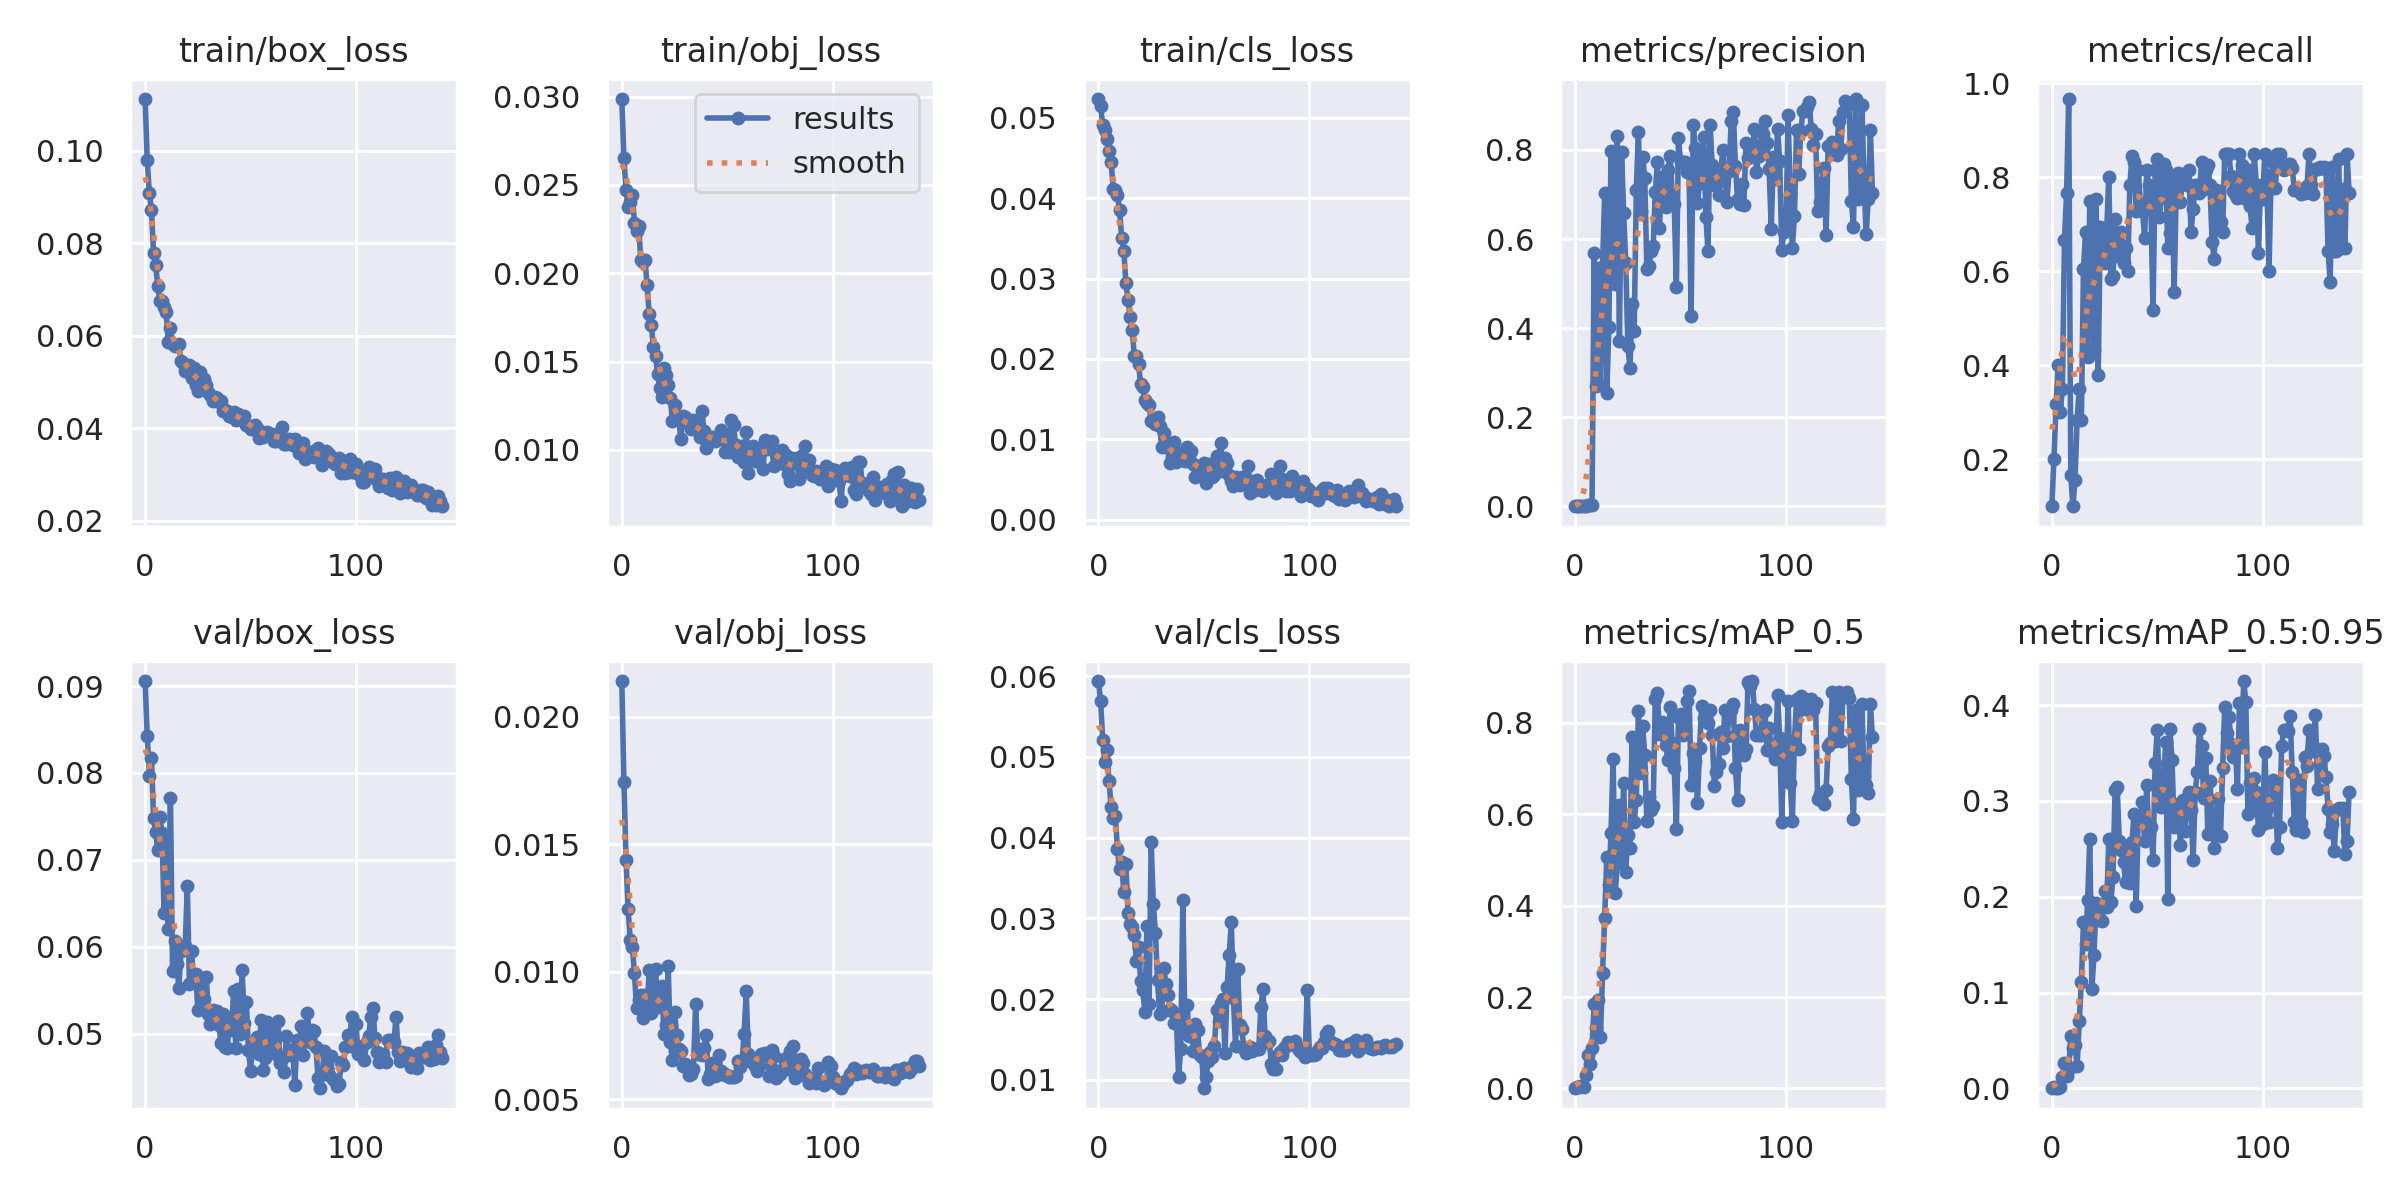

In [30]:
from utils.plots import plot_results  # plot results.txt as results.png
Image(filename='/content/yolov5/runs/train/exp3/results.png', width=1000)  # view results.png

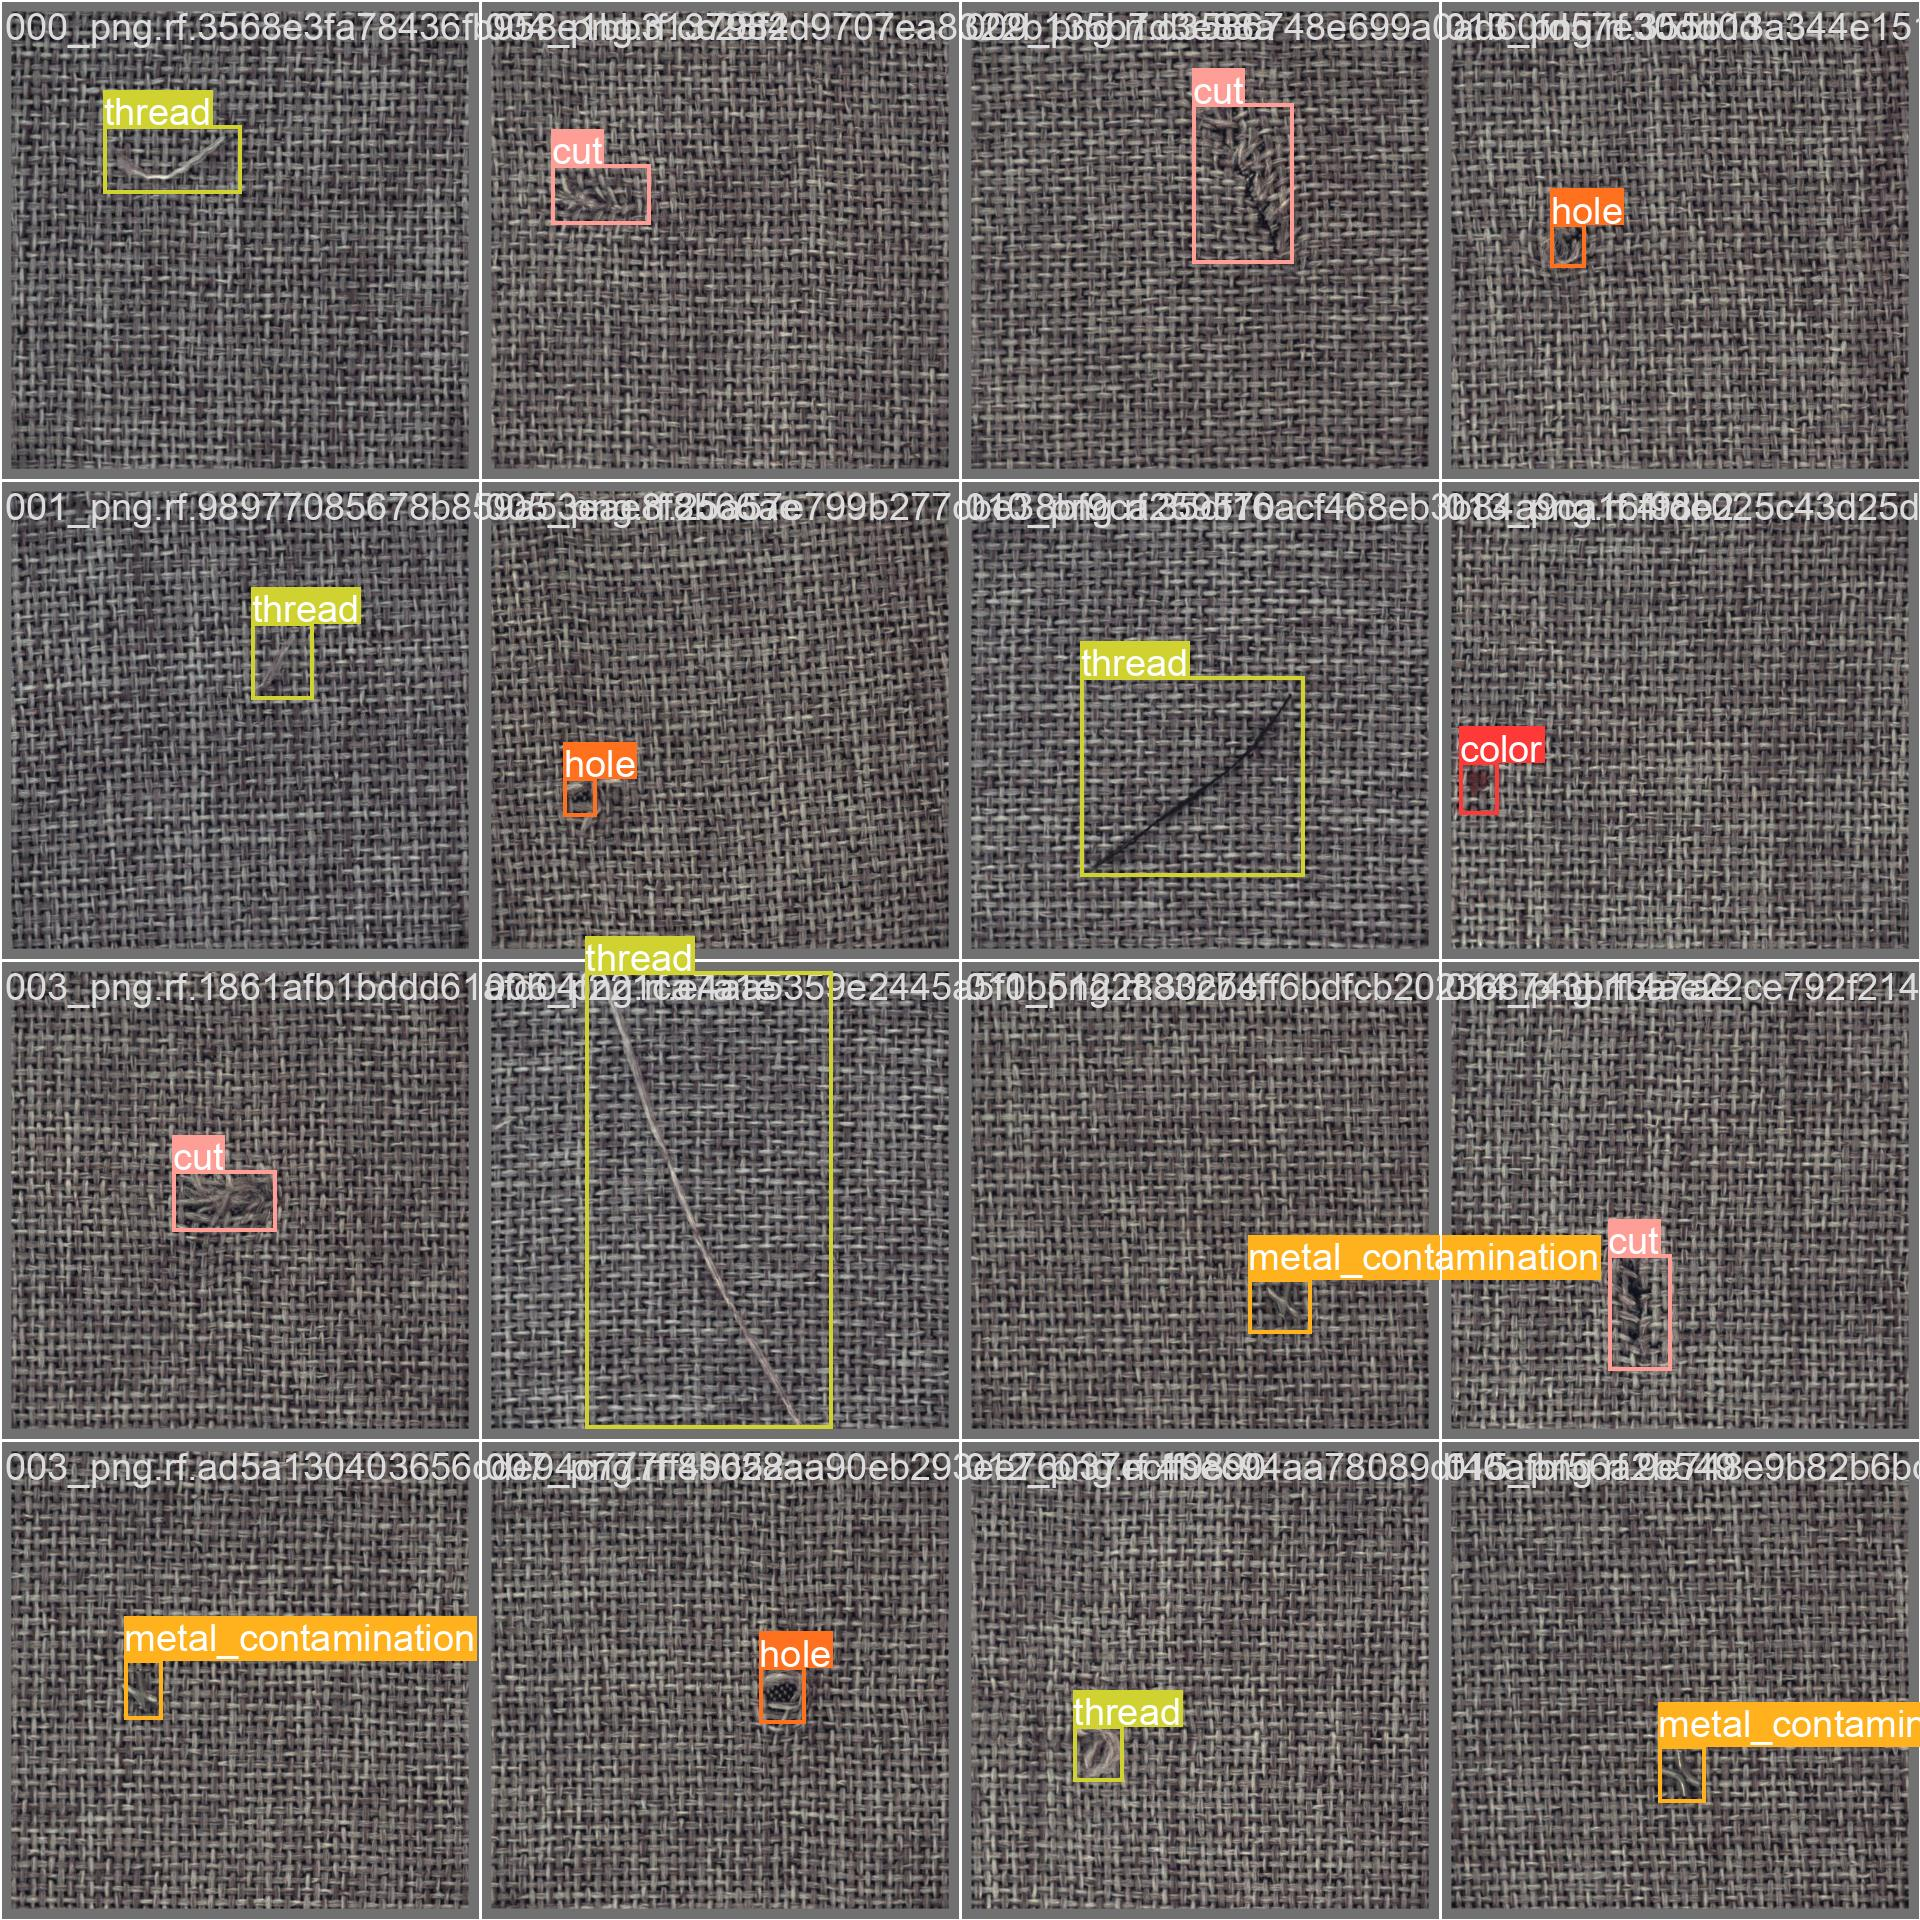

In [31]:
Image(filename="/content/yolov5/runs/train/exp3/val_batch0_labels.jpg", width=900)

In [32]:
%cd /content/yolov5/
!python detect.py --weights runs/train/exp3/weights/best.pt --img 640 --conf 0.4 --source Fabric-Defect-V2-7/test/images/

/content/yolov5
detect: weights=['runs/train/exp3/weights/best.pt'], source=Fabric-Defect-V2-7/test/images/, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-331-gab364c98 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7023610 parameters, 0 gradients, 15.8 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/9 /content/yolov5/Fabric-Defect-V2-7/test/images/001_png.rf.38683b670b98422e5428db22bbd828c3.jpg: 640x640 1 color, 11.5ms
image 2/9 /content/yolov5/Fabric-Defect-V2-7/test/images/002_png.rf.35dac75bb4bace3b1d4a47ac03634aa3.jpg: 640x640 1 metal_conta

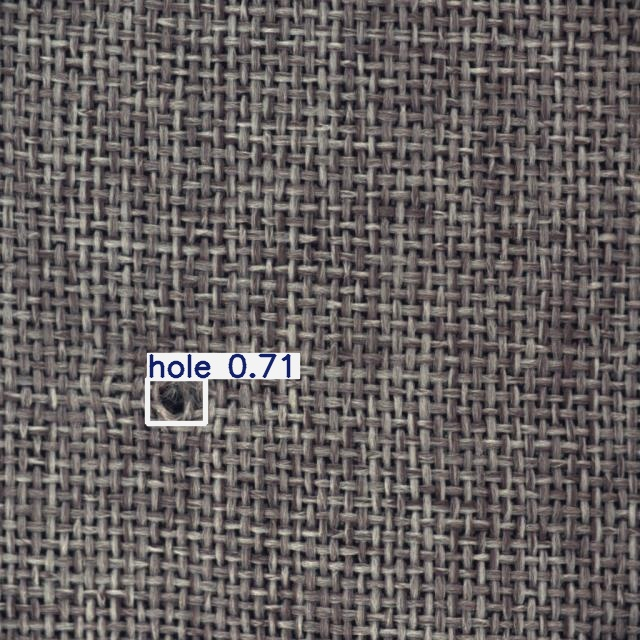

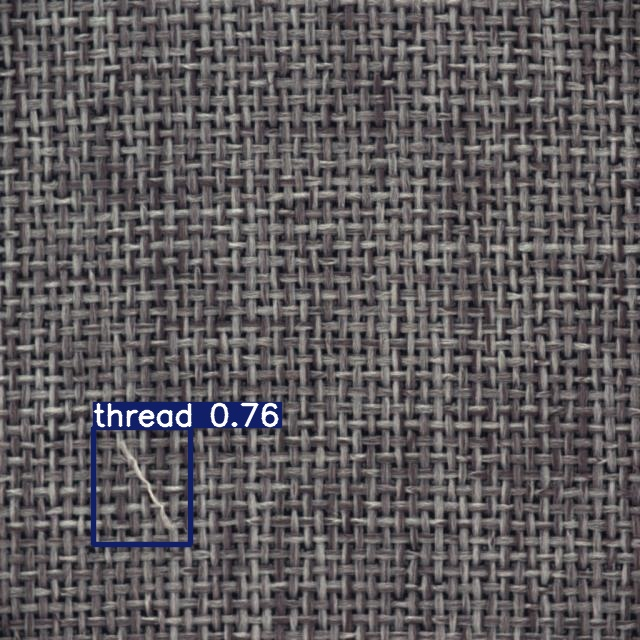

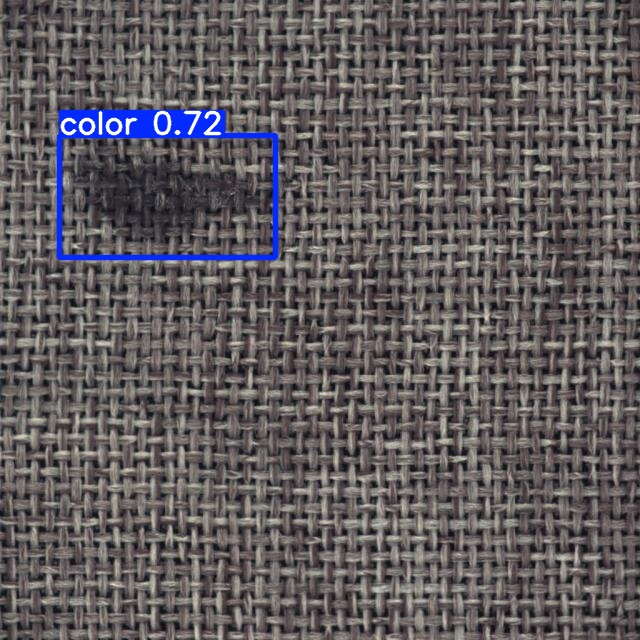

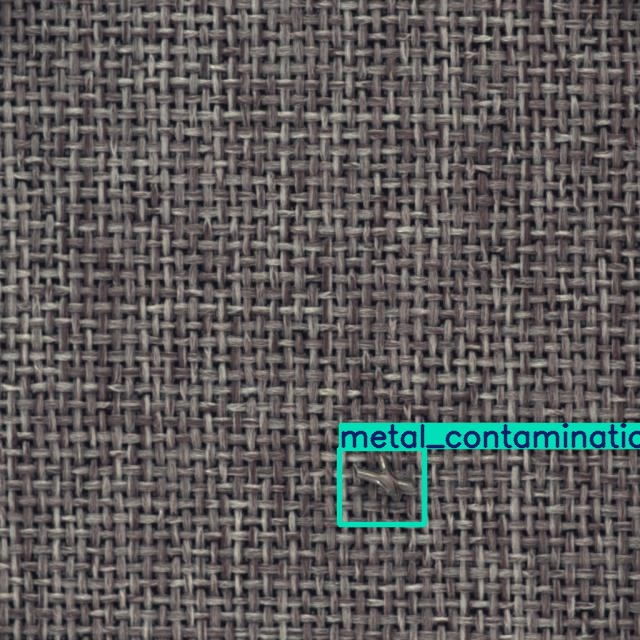

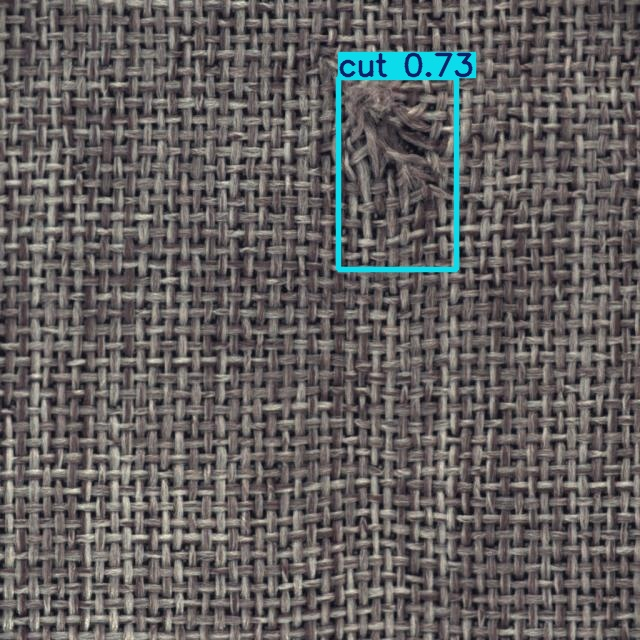

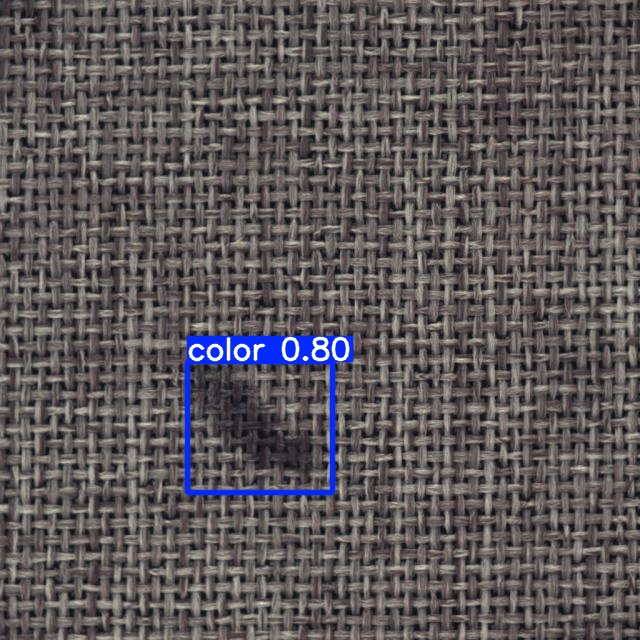

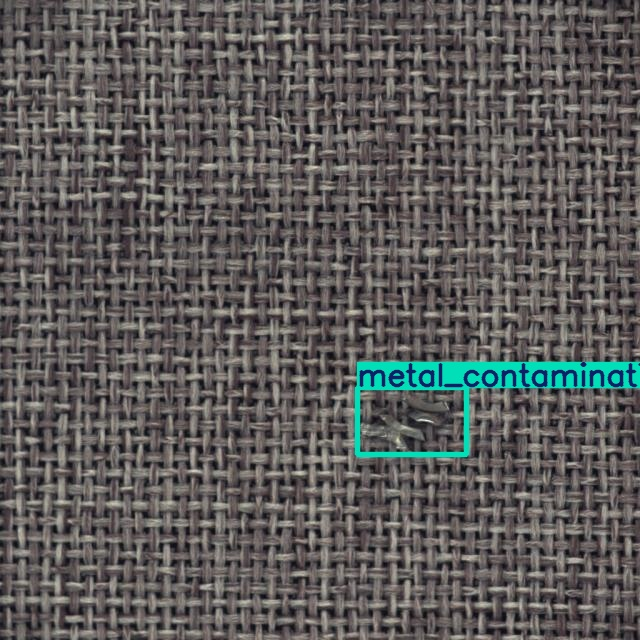

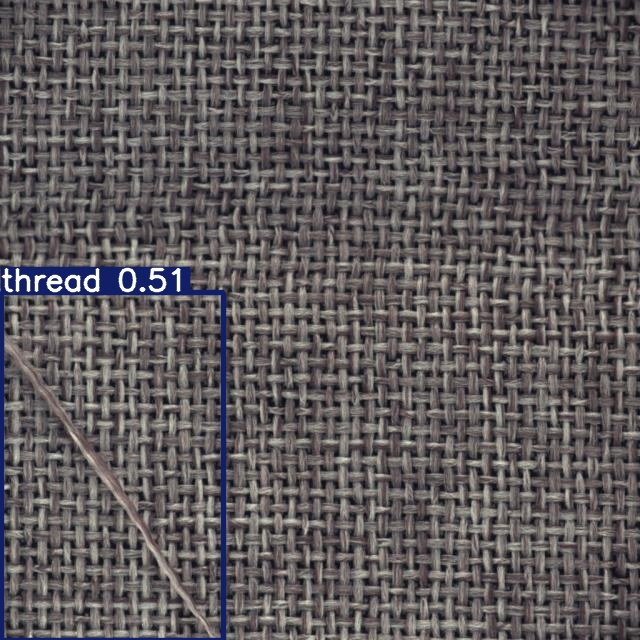

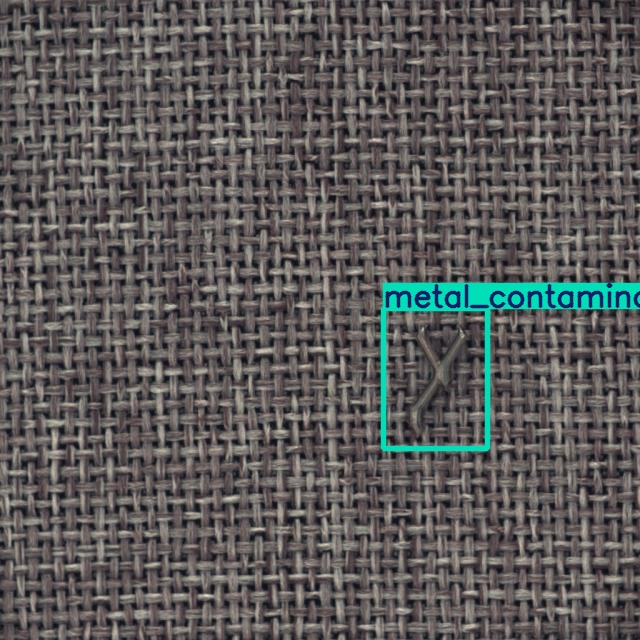

In [35]:
import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/yolov5/runs/detect/exp7/*.jpg')[:9]: #assuming JPG
    display(Image(filename=imageName))